<a href="https://colab.research.google.com/github/aparnaashok2125/Elevate-Labs-AI-ML-Internship/blob/main/TASK_7_Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines on the Breast Cancer Wisconsin (Diagnostic) Data Set

**Goal**: Predict breast cancer given all other values with the use of SVMs. <br>
**Approach**:
<ol>
    <li>Supervised Learning task, because given labeled traning examples.</li>
    <li>Classification task.</li>
    <li>There is no continuous flow of data, no need to adjust to changing data, and the data is small enough to fit in memmory: Batch Learning</li>
</ol>

**Data:** [Breast Cancer Wisconsin (Diagnostic) Data Set | Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/version/2#)<br>

SVM's goal is to have largest possible margin between decision boundary that separetes the classes and the training instances.
                                                                   
## Take a Look at the Data
First, lets load the data and gain some insight about it:

In [13]:
 # importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing the dataset
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99000,10.38000,122.80000,1001.00000,0.11840,0.27760,0.30010,0.14710,...,17.33000,184.60000,2019.00000,0.16220,0.66560,0.71190,0.26540,0.46010,0.11890,NaN
1,842517,M,20.57000,17.77000,132.90000,1326.00000,0.08474,0.07864,0.08690,0.07017,...,23.41000,158.80000,1956.00000,0.12380,0.18660,0.24160,0.18600,0.27500,0.08902,NaN
2,84300903,M,19.69000,21.25000,130.00000,1203.00000,0.10960,0.15990,0.19740,0.12790,...,25.53000,152.50000,1709.00000,0.14440,0.42450,0.45040,0.24300,0.36130,0.08758,NaN
3,84348301,M,11.42000,20.38000,77.58000,386.10000,0.14250,0.28390,0.24140,0.10520,...,26.50000,98.87000,567.70000,0.20980,0.86630,0.68690,0.25750,0.66380,0.17300,NaN
4,84358402,M,20.29000,14.34000,135.10000,1297.00000,0.10030,0.13280,0.19800,0.10430,...,16.67000,152.20000,1575.00000,0.13740,0.20500,0.40000,0.16250,0.23640,0.07678,NaN


Let's check if there are any missing values:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We have total of 569 instances. Our label, diagnosis is type of object while all other attributes are floating point. We don't have any missing values. Let's take a look at the label attribute:

In [18]:
df["diagnosis"].value_counts()

,count
diagnosis,
B,357
M,212


M = malignant (hostile), B = benign. Now let's look at the statistics to gain insights of the numerical data:

In [19]:
# format the scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,...,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,0.00000
mean,30371831.43234,14.12729,19.28965,91.96903,654.88910,0.09636,0.10434,0.08880,0.04892,0.18116,...,25.67722,107.26121,880.58313,0.13237,0.25427,0.27219,0.11461,0.29008,0.08395,NaN
std,125020585.61222,3.52405,4.30104,24.29898,351.91413,0.01406,0.05281,0.07972,0.03880,0.02741,...,6.14626,33.60254,569.35699,0.02283,0.15734,0.20862,0.06573,0.06187,0.01806,NaN
min,8670.00000,6.98100,9.71000,43.79000,143.50000,0.05263,0.01938,0.00000,0.00000,0.10600,...,12.02000,50.41000,185.20000,0.07117,0.02729,0.00000,0.00000,0.15650,0.05504,NaN
25%,869218.00000,11.70000,16.17000,75.17000,420.30000,0.08637,0.06492,0.02956,0.02031,0.16190,...,21.08000,84.11000,515.30000,0.11660,0.14720,0.11450,0.06493,0.25040,0.07146,NaN
50%,906024.00000,13.37000,18.84000,86.24000,551.10000,0.09587,0.09263,0.06154,0.03350,0.17920,...,25.41000,97.66000,686.50000,0.13130,0.21190,0.22670,0.09993,0.28220,0.08004,NaN
75%,8813129.00000,15.78000,21.80000,104.10000,782.70000,0.10530,0.13040,0.13070,0.07400,0.19570,...,29.72000,125.40000,1084.00000,0.14600,0.33910,0.38290,0.16140,0.31790,0.09208,NaN
max,911320502.00000,28.11000,39.28000,188.50000,2501.00000,0.16340,0.34540,0.42680,0.20120,0.30400,...,49.54000,251.20000,4254.00000,0.22260,1.05800,1.25200,0.29100,0.66380,0.20750,NaN


There is one attribute that we are not sure what it is "Unnamed". We will drop this attribute. Also, we don't need the id column as it only identifies the entry:

In [20]:
data = df.loc[:, ~df.columns.str.contains('^Unnamed')]
data.drop(["id"], axis=1, inplace=True)
data.describe()

/tmp/ipython-input-20-3758583914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(["id"], axis=1, inplace=True)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,...,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000,569.00000
mean,14.12729,19.28965,91.96903,654.88910,0.09636,0.10434,0.08880,0.04892,0.18116,0.06280,...,16.26919,25.67722,107.26121,880.58313,0.13237,0.25427,0.27219,0.11461,0.29008,0.08395
std,3.52405,4.30104,24.29898,351.91413,0.01406,0.05281,0.07972,0.03880,0.02741,0.00706,...,4.83324,6.14626,33.60254,569.35699,0.02283,0.15734,0.20862,0.06573,0.06187,0.01806
min,6.98100,9.71000,43.79000,143.50000,0.05263,0.01938,0.00000,0.00000,0.10600,0.04996,...,7.93000,12.02000,50.41000,185.20000,0.07117,0.02729,0.00000,0.00000,0.15650,0.05504
25%,11.70000,16.17000,75.17000,420.30000,0.08637,0.06492,0.02956,0.02031,0.16190,0.05770,...,13.01000,21.08000,84.11000,515.30000,0.11660,0.14720,0.11450,0.06493,0.25040,0.07146
50%,13.37000,18.84000,86.24000,551.10000,0.09587,0.09263,0.06154,0.03350,0.17920,0.06154,...,14.97000,25.41000,97.66000,686.50000,0.13130,0.21190,0.22670,0.09993,0.28220,0.08004
75%,15.78000,21.80000,104.10000,782.70000,0.10530,0.13040,0.13070,0.07400,0.19570,0.06612,...,18.79000,29.72000,125.40000,1084.00000,0.14600,0.33910,0.38290,0.16140,0.31790,0.09208
max,28.11000,39.28000,188.50000,2501.00000,0.16340,0.34540,0.42680,0.20120,0.30400,0.09744,...,36.04000,49.54000,251.20000,4254.00000,0.22260,1.05800,1.25200,0.29100,0.66380,0.20750


Now let's plot the numerical data to see the distributions:

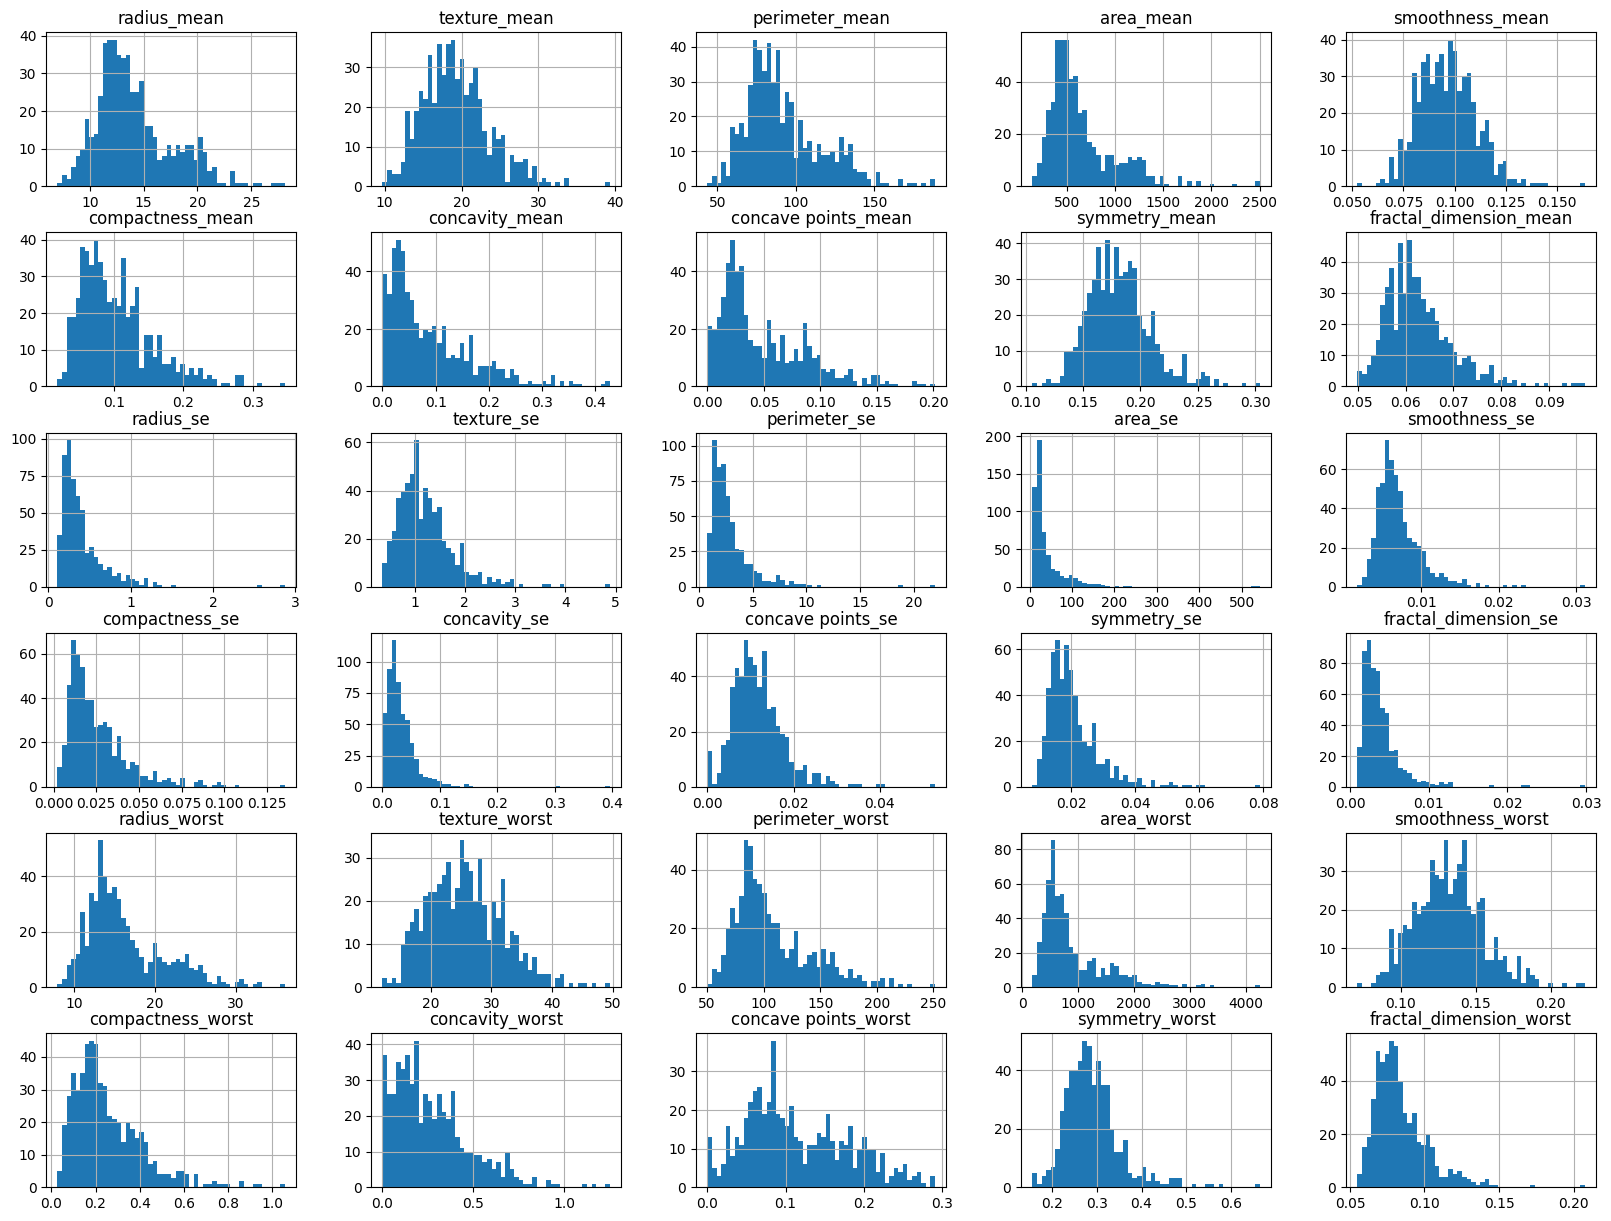

In [21]:
# plot within jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# plot histogram
data.hist(bins=50, figsize=(20,15))
plt.show()

## Separete Features from Labels
Let's seperate the features from the labels:

In [22]:
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"].values.copy()

X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99000,10.38000,122.80000,1001.00000,0.11840,0.27760,0.30010,0.14710,0.24190,0.07871,...,25.38000,17.33000,184.60000,2019.00000,0.16220,0.66560,0.71190,0.26540,0.46010,0.11890
1,20.57000,17.77000,132.90000,1326.00000,0.08474,0.07864,0.08690,0.07017,0.18120,0.05667,...,24.99000,23.41000,158.80000,1956.00000,0.12380,0.18660,0.24160,0.18600,0.27500,0.08902
2,19.69000,21.25000,130.00000,1203.00000,0.10960,0.15990,0.19740,0.12790,0.20690,0.05999,...,23.57000,25.53000,152.50000,1709.00000,0.14440,0.42450,0.45040,0.24300,0.36130,0.08758
3,11.42000,20.38000,77.58000,386.10000,0.14250,0.28390,0.24140,0.10520,0.25970,0.09744,...,14.91000,26.50000,98.87000,567.70000,0.20980,0.86630,0.68690,0.25750,0.66380,0.17300
4,20.29000,14.34000,135.10000,1297.00000,0.10030,0.13280,0.19800,0.10430,0.18090,0.05883,...,22.54000,16.67000,152.20000,1575.00000,0.13740,0.20500,0.40000,0.16250,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56000,22.39000,142.00000,1479.00000,0.11100,0.11590,0.24390,0.13890,0.17260,0.05623,...,25.45000,26.40000,166.10000,2027.00000,0.14100,0.21130,0.41070,0.22160,0.20600,0.07115
565,20.13000,28.25000,131.20000,1261.00000,0.09780,0.10340,0.14400,0.09791,0.17520,0.05533,...,23.69000,38.25000,155.00000,1731.00000,0.11660,0.19220,0.32150,0.16280,0.25720,0.06637
566,16.60000,28.08000,108.30000,858.10000,0.08455,0.10230,0.09251,0.05302,0.15900,0.05648,...,18.98000,34.12000,126.70000,1124.00000,0.11390,0.30940,0.34030,0.14180,0.22180,0.07820
567,20.60000,29.33000,140.10000,1265.00000,0.11780,0.27700,0.35140,0.15200,0.23970,0.07016,...,25.74000,39.42000,184.60000,1821.00000,0.16500,0.86810,0.93870,0.26500,0.40870,0.12400


In [23]:
y[:25]

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M'],
      dtype=object)

## Separate Test and Training Sets
Now we can setup our ML pipeline. First we need to split our dataset into training and test sets:

In [26]:
from sklearn.model_selection import train_test_split

# test set size of 10% of the data and the random seed 42 <3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(len(X_train))
print(len(X_test))

print(len(y_train))
print(len(y_test))

512
57
512
57


## Classification

Let's create a pipeline that will use LinearSVC. First, it will normalize the feature values using Standard Scaler. Hyperparameter C 1, and loss function hinge will be used:

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))
])

svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

Now let's do a prediction on few values from training set:

In [28]:
predictions = svm_clf.predict(X_train.iloc[:5])
actual = y_train[:5]

print("Predictions\t", "Actual\t\t")
for index in range(len(predictions)):
    print(predictions[index], "\t\t", actual[index])

Predictions	 Actual		
M 		 M
M 		 M
B 		 B
B 		 B
M 		 M


This looks very good. Now let's try different SVMs:

In [29]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# hyperparameter C
C = 5
alpha = 1 / (C * len(X))


lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42)

In [30]:
import numpy as np

# scaler instance
scaler = StandardScaler()

# pre-process the train and test data
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [31]:
# train the models
lin_clf.fit(X_train_scaled, y_train)
svm_clf.fit(X_train_scaled, y_train)
sgd_clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SGDClassifier(alpha=0.000351493848857645, eta0=0.001, learning_rate='constant',
              random_state=42)

In [32]:
print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.29070968] [[-0.17590364 -0.1713671  -0.3420177   0.17161704 -0.02327176 -1.34324253
   0.94173892  1.96570947  0.11725439  0.29203429  2.17939075 -0.93720164
  -0.73055965  1.2156781   0.56118287  0.16713158 -1.14031459  0.95152206
  -0.31947553 -1.54708469  1.66894856  2.0754543   0.19695592  1.79895483
   0.54655433 -0.74691114  1.99187366  0.05972335  0.98537982  0.37088518]]
SVC:                          [0.27734547] [[-0.13835798 -0.19117438 -0.33320334  0.18792357  0.11958347 -1.39530633
   0.85559291  1.90922728  0.09738844  0.20973666  2.13153612 -0.91240547
  -0.50202495  1.10012354  0.56302415  0.18036127 -1.17080123  1.04874381
  -0.37435025 -1.61909106  1.63267157  2.06021598  0.18377153  1.76890096
   0.43498646 -0.69551771  2.10062614 -0.12490681  1.06041044  0.43850067]]
SGDClassifier(alpha=0.00035): [-0.218] [[ 0.25344145  0.32575485  0.24360114  0.26856115  0.05514688 -0.05580701
   0.25944886  0.29875395  0.0734792  -0.19871819  0.2935

## Evaluate SVM with the Accuracy Scores:

In [33]:
# function to print out classification model report
def classification_report(model_name, test, pred, label):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score

    print(model_name, ":\n")

    print("Accuracy Score: ", '{:,.3f}'.format(float(accuracy_score(test, pred)) * 100), "%")
    print("     Precision: ", '{:,.3f}'.format(float(precision_score(test, pred, pos_label=label)) * 100), "%")
    print("        Recall: ", '{:,.3f}'.format(float(recall_score(test, pred, pos_label=label)) * 100), "%")
    print("      F1 score: ", '{:,.3f}'.format(float(f1_score(test, pred, pos_label=label)) * 100), "%")

In [34]:
lin_clf_pred = lin_clf.predict(X_train_scaled)
classification_report("LinearSVC with Hinge loss function and C=5 Hyperparameter", y_train, lin_clf_pred, "M")

LinearSVC with Hinge loss function and C=5 Hyperparameter :

Accuracy Score:  99.414 %
     Precision:  100.000 %
        Recall:  98.462 %
      F1 score:  99.225 %


In [35]:
svm_clf_pred = svm_clf.predict(X_train_scaled)
classification_report("SVM with linear kernel and C=5 Hyperparameter", y_train, svm_clf_pred, "M")

SVM with linear kernel and C=5 Hyperparameter :

Accuracy Score:  99.414 %
     Precision:  100.000 %
        Recall:  98.462 %
      F1 score:  99.225 %


In [36]:
sgd_clf_pred = sgd_clf.predict(X_train_scaled)
classification_report("SGDClassifier", y_train, sgd_clf_pred, "M")

SGDClassifier :

Accuracy Score:  98.242 %
     Precision:  98.947 %
        Recall:  96.410 %
      F1 score:  97.662 %


## Evaluate SVM on Test Set:

In [37]:
lin_clf_pred_test = lin_clf.predict(X_test_scaled)
svm_clf_pred_test = svm_clf.predict(X_test_scaled)
sgd_clf_pred_test = sgd_clf.predict(X_test_scaled)

In [38]:
classification_report("LinearSVC on Test Set", y_test, lin_clf_pred_test, "M")

LinearSVC on Test Set :

Accuracy Score:  96.491 %
     Precision:  94.118 %
        Recall:  94.118 %
      F1 score:  94.118 %


In [39]:
classification_report("SVM on Test Set", y_test, svm_clf_pred_test, "M")

SVM on Test Set :

Accuracy Score:  96.491 %
     Precision:  94.118 %
        Recall:  94.118 %
      F1 score:  94.118 %


In [40]:
classification_report("SGDClassifier on Test Set", y_test, sgd_clf_pred_test, "M")

SGDClassifier on Test Set :

Accuracy Score:  98.246 %
     Precision:  100.000 %
        Recall:  94.118 %
      F1 score:  96.970 %
